# 冒泡排序

## 步骤

1.比较相邻的元素。如果第一个比第二个大，就交换他们两个

2.对第0个到第n-1个数据做同样的工作。这时，最大的数就“浮”到了数组最后的位置上

3.针对所有的元素重复以上的步骤，除了最后一个

4.持续每次对越来越少的元素重复上面的步骤，直到没有任何一对数字需要比较

遍历数组，比较两个相邻的值。首先会把最大的值排到最后，然后把次大的值排到倒数第二，如此循环

In [64]:
import random

def random_arr(length):
    arr = []
    for i in range(length):
        arr.append(random.randint(0,100))
    return arr

def test(fun ,ret=False):
    for i in range(3):
        arr = random_arr(10)
        print(arr)
        if ret:
            arr = fun(arr)
        else:
            fun(arr)
        print(arr)
        print()

def bubble(arr):
    length = len(arr)
    for i in range(length):
        for j in range(1, length-i):
            if arr[j-1] > arr[j]:
                arr[j-1], arr[j] = arr[j], arr[j-1]
                
test(bubble)

[99, 35, 18, 76, 8, 97, 59, 78, 81, 61]
[8, 18, 35, 59, 61, 76, 78, 81, 97, 99]

[83, 29, 28, 37, 82, 61, 82, 87, 86, 3]
[3, 28, 29, 37, 61, 82, 82, 83, 86, 87]

[31, 16, 9, 48, 68, 39, 29, 20, 49, 59]
[9, 16, 20, 29, 31, 39, 48, 49, 59, 68]



## 优化
1. 如果某次遍历没有交换，这排好序了

2. 记录某次遍历时最后发生数据交换的位置，这个位置之后的数据显然已经有序，不用再排序了。因此通过记录最后发生数据交换的位置就可以确定下次循环的范围了。

In [11]:
# 优化1
def bubble1(arr):
    length = len(arr)
    for i in range(length):
        flag = 1
        for j in range(1, length-i):
            if arr[j-1] > arr[j]:
                arr[j-1], arr[j] = arr[j], arr[j-1]
                flag = 0
        if flag:
            break
# 优化2     
def bubble2(arr):
    length = len(arr)
    last_modify = length 
    for i in range(length):
        flag = 1
        for j in range(1, last_modify):
            if arr[j-1] > arr[j]:
                arr[j-1], arr[j] = arr[j], arr[j-1]
                last_modify = j
test(bubble2)

[70, 68, 39, 25, 10, 21, 23, 49, 17, 80]
[10, 17, 21, 23, 25, 39, 49, 68, 70, 80]


# 选择排序
## 步骤

1.在未排序序列中找到最小（大）元素，存放到排序序列的起始位置。

2.再从剩余未排序元素中继续寻找最小（大）元素，然后放到已排序序列的末尾。

3.以此类推，直到所有元素均排序完毕。

In [22]:
def select(arr):
    length = len(arr)
    for i in range(length):
        max = 0
        for j in range(length-i):
            if arr[j] > arr[max]:
                max = j
        last = length - i - 1
        arr[max], arr[last] = arr[last], arr[max]
test(select)

[21, 3, 80, 42, 30, 22, 31, 24, 36, 76]
[3, 21, 22, 24, 30, 31, 36, 42, 76, 80]

[77, 6, 4, 40, 56, 40, 9, 19, 63, 89]
[4, 6, 9, 19, 40, 40, 56, 63, 77, 89]

[7, 10, 61, 29, 45, 37, 100, 26, 6, 59]
[6, 7, 10, 26, 29, 37, 45, 59, 61, 100]



# 插入排序
## 步骤
1.从第一个元素开始，该元素可以认为已经被排序

2.取出下一个元素，在已经排序的元素序列中从后向前扫描

3.如果被扫描的元素（已排序）大于新元素，将该元素后移一位

4.重复步骤3，直到找到已排序的元素小于或者等于新元素的位置

5.将新元素插入到该位置后

6.重复步骤2~5
![image.png](http://wuchong.me/img/Insertion-sort-example-300px.gif)

In [27]:
def insert(ary):
    n = len(ary)
    for i in range(1,n):
        if ary[i] < ary[i-1]:
            temp = ary[i]
            index = i           #待插入的下标
            for j in range(i-1,-1,-1):  #从i-1 循环到 0 (包括0)
                if ary[j] > temp :
                    ary[j+1] = ary[j]
                    index = j   #记录待插入下标
                else :
                    break
test(insert)

[76, 41, 4, 62, 78, 97, 26, 93, 42, 53]
[76, 76, 76, 76, 76, 76, 76, 78, 97, 97]

[49, 89, 13, 13, 59, 98, 50, 73, 85, 0]
[49, 49, 49, 49, 89, 89, 89, 89, 89, 98]

[35, 7, 59, 8, 85, 97, 5, 9, 13, 52]
[35, 35, 35, 35, 35, 35, 59, 59, 85, 97]



# 希尔排序 
希尔排序，也称递减增量排序算法，实质是分组插入排序。由 Donald Shell 于1959年提出。希尔排序是非稳定排序算法。

希尔排序的基本思想是：将数组列在一个表中并对列分别进行插入排序，重复这过程，不过每次用更长的列（步长更长了，列数更少了）来进行。最后整个表就只有一列了。将数组转换至表是为了更好地理解这算法，算法本身还是使用数组进行排序。


In [ ]:
def shell(ary):
    n = len(ary)
    gap = round(n/2)       #初始步长 , 用round四舍五入取整
    while gap > 0 :
        for i in range(gap,n):        #每一列进行插入排序 , 从gap 到 n-1
            temp = ary[i]
            j = i
            while ( j >= gap and ary[j-gap] > temp ):    #插入排序
                ary[j] = ary[j-gap]
                j = j - gap
            ary[j] = temp
        gap = round(gap/2)                     #重新设置步长
    return ary

# 归并排序 
先考虑合并两个有序数组，基本思路是比较两个数组的最前面的数，谁小就先取谁，取了后相应的指针就往后移一位。然后再比较，直至一个数组为空，最后把另一个数组的剩余部分复制过来即可。

再考虑递归分解，基本思路是将数组分解成left和right，如果这两个数组内部数据是有序的，那么就可以用上面合并数组的方法将这两个数组合并排序。如何让这两个数组内部是有序的？可以再二分，直至分解出的小组只含有一个元素时为止，此时认为该小组内部已有序。然后合并排序相邻二个小组即可。

In [54]:
def merge_sort(arr):
    if len(arr) == 1:
        return arr
    width = round(len(arr)/2)
    arr1 = arr[:width]
    arr2 = arr[width:]
    merge_sort(arr1)
    merge_sort(arr2)
    
    res = merge(arr1, arr2)
    for i in range(len(res)):
        arr[i] = res[i]
    return arr
    
def merge(arr1, arr2):
    length1 = len(arr1)
    length2 = len(arr2)
    res = []
    cursor = 0
    for i in range(length1):
        while cursor != length2 and arr1[i] > arr2[cursor]:
            res.append(arr2[cursor])
            cursor += 1
        res.append(arr1[i])
    res.extend(arr2[cursor:])
    return res

test(merge_sort)

[40, 79, 48, 0, 75, 29, 74, 50, 34, 23]
[0, 23, 29, 34, 40, 48, 50, 74, 75, 79]

[48, 94, 60, 5, 28, 81, 65, 58, 97, 13]
[5, 13, 28, 48, 58, 60, 65, 81, 94, 97]

[23, 30, 96, 37, 68, 11, 82, 9, 18, 93]
[9, 11, 18, 23, 30, 37, 68, 82, 93, 96]



# 快速排序

## 步骤
1.从数列中挑出一个元素作为基准数。

2.分区过程，将比基准数大的放到右边，小于或等于它的数都放到左边。

3.再对左右区间递归执行第二步，直至各区间只有一个数。

In [65]:
def quick_sort(ary):
    return qsort(ary,0,len(ary)-1)
def qsort(ary,left,right):
    #快排函数，ary为待排序数组，left为待排序的左边界，right为右边界
    if left >= right : return ary
    key = ary[left]     #取最左边的为基准数
    lp = left           #左指针
    rp = right          #右指针
    while lp < rp :
        while ary[rp] >= key and lp < rp :
            rp -= 1
        while ary[lp] <= key and lp < rp :
            lp += 1
        ary[lp],ary[rp] = ary[rp],ary[lp]
    ary[left],ary[lp] = ary[lp],ary[left]
    qsort(ary,left,lp-1)
    qsort(ary,rp+1,right)
    return ary

[38, 77, 46, 75, 4, 7, 6, 31, 61, 73]
[4, 6, 7, 31, 38, 46, 61, 73, 75, 77]

[20, 4, 9, 53, 96, 13, 75, 15, 54, 44]
[4, 9, 13, 15, 20, 44, 53, 54, 75, 96]

[47, 31, 92, 68, 76, 18, 52, 52, 33, 2]
[2, 18, 31, 33, 47, 52, 52, 68, 76, 92]



# 堆排序
堆排序在 top K 问题中使用比较频繁。堆排序是采用二叉堆的数据结构来实现的，虽然实质上还是一维数组。二叉堆是一个近似完全二叉树 。

二叉堆具有以下性质：

父节点的键值总是大于或等于（小于或等于）任何一个子节点的键值。
每个节点的左右子树都是一个二叉堆（都是最大堆或最小堆）。

## 步骤
1.构造最大堆（Build_Max_Heap）：若数组下标范围为0~n，考虑到单独一个元素是大根堆，则从下标n/2开始的元素均为大根堆。于是只要从n/2-1开始，向前依次构造大根堆，这样就能保证，构造到某个节点时，它的左右子树都已经是大根堆。

2.堆排序（HeapSort）：由于堆是用数组模拟的。得到一个大根堆后，数组内部并不是有序的。因此需要将堆化数组有序化。思想是移除根节点，并做最大堆调整的递归运算。第一次将heap[0]与heap[n-1]交换，再对heap[0...n-2]做最大堆调整。第二次将heap[0]与heap[n-2]交换，再对heap[0...n-3]做最大堆调整。重复该操作直至heap[0]和heap[1]交换。由于每次都是将最大的数并入到后面的有序区间，故操作完后整个数组就是有序的了。

3.最大堆调整（Max_Heapify）：该方法是提供给上述两个过程调用的。目的是将堆的末端子节点作调整，使得子节点永远小于父节点 。
![image.png](http://wuchong.me/img/Heapsort-example.gif)

In [ ]:
def heap_sort(ary) :
    n = len(ary)
    first = int(n/2-1)       #最后一个非叶子节点
    for start in range(first,-1,-1) :     #构造大根堆
        max_heapify(ary,start,n-1)
    for end in range(n-1,0,-1):           #堆排，将大根堆转换成有序数组
        ary[end],ary[0] = ary[0],ary[end]
        max_heapify(ary,0,end-1)
    return ary
#最大堆调整：将堆的末端子节点作调整，使得子节点永远小于父节点
#start为当前需要调整最大堆的位置，end为调整边界
def max_heapify(ary,start,end):
    root = start
    while True :
        child = root*2 +1               #调整节点的子节点
        if child > end : break
        if child+1 <= end and ary[child] < ary[child+1] :
            child = child+1             #取较大的子节点
        if ary[root] < ary[child] :     #较大的子节点成为父节点
            ary[root],ary[child] = ary[child],ary[root]     #交换
            root = child
        else :
            break

# 总结
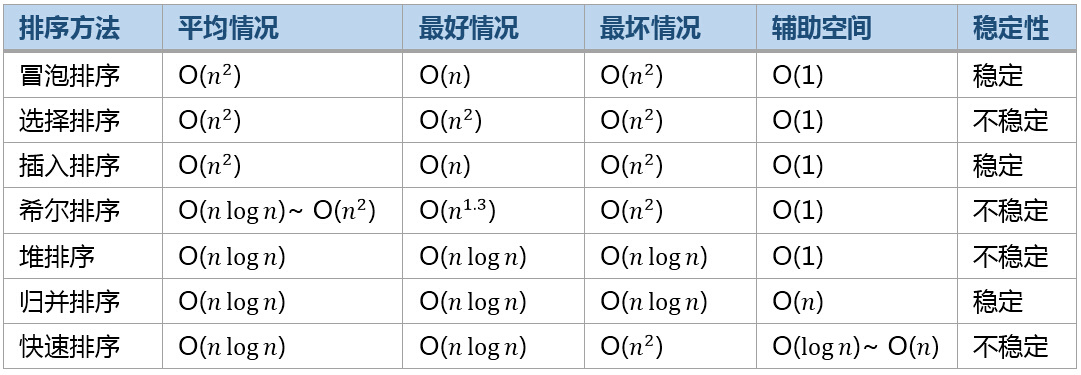

# 线性时间排序
## 计数排序
当输入的元素是n个0-k之间的整数时，它的运行时间是O(k+n)。计数排序不是比较排序，排序的速度快于任何比较排序算法。
他是一种稳定的排序

In [69]:
k = 100
def counting_sort(arr, k=100):
    cnt = [0 for i in range(k)]
    res = [0 for i in range(len(arr))]
    for i in arr:
        cnt[i] += 1
    for i in range(1, k):
        cnt[i] += cnt[i-1]
    for i in arr:                 ## 为了稳定性，此处应该reverse
        res[cnt[i]-1] = i
        cnt[i] -= 1
    return res
test(counting_sort, True)

[36, 20, 67, 58, 0, 24, 39, 0, 76, 88]
[0, 0, 20, 24, 36, 39, 58, 67, 76, 88]

[93, 38, 24, 88, 27, 25, 97, 67, 8, 86]
[8, 24, 25, 27, 38, 67, 86, 88, 93, 97]

[85, 41, 58, 43, 76, 35, 95, 51, 14, 30]
[14, 30, 35, 41, 43, 51, 58, 76, 85, 95]



## 桶排序
简单说就数据分块，每个块使用其他排序算法。
数据分块算法需要满足$x_1 >= x_2$时$f(x_1) >= f(x_2)$

## 基数排序(Radix Sort)
它是这样实现的：将所有待比较数值（正整数）统一为同样的数位长度，数位较短的数前面补零。然后，从最低位开始，依次进行一次排序。这样从最低位排序一直到最高位排序完成以后，数列就变成一个有序序列。

In [ ]:
import math
def sort(a, radix=10):
    """a为整数列表， radix为基数"""
    K = int(math.ceil(math.log(max(a)+1, radix))) # 用K位数可表示任意整数
    for i in range(1, K+1): # K次循环
        bucket = [[] for i in range(radix)] # 不能用 [[]]*radix，否则相当于开了radix个完全相同的list对象
        for val in a:
            bucket[val%(radix**i)//(radix**(i-1))].append(val) # 獲得整數第K位數字 （從低到高）
        del a[:]
        for each in bucket:
            a.extend(each) # 桶合并